## MINIPROYECTO 2: Modelos de Variable Latente y Clasificadores Lineales para el reconocimiento de Patrones

Vanessa Jaramillo Sánchez

Jonny Taborda Acosta

Carlos Andres Posada Chica

*Tratamiento de Señales III*

*Facultad de Ingeniería*

*Prof. Hernán Felipe García*

*2021*

In [ ]:
#LIBRERIAS

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from seaborn import pairplot
from google.colab import files
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score


In [ ]:
#Cargamos el excel con los datos de la tabla del Miniproyecto 1

drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv('export_dataframe.csv')
data

,Pmax,F_Pmax,Energia,Media,Var,Max,Min,Pmax1,F_Pmax1,Energia1,Media1,Var1,Max1,Min1,Pmax2,F_Pmax2,Energia2,Media2,Var2,Max2,Min2,Etiquetas
0,0.030690,1.394531,5.833147,0.003339,0.000024,0.030690,0.000095,0.011026,24.105469,1.892021,0.001422,1.862273e-06,0.011026,0.000066,0.007237,48.609375,1.178796,0.001377,2.637633e-06,0.007237,0.000027,0.0
1,0.035069,1.394531,6.955434,0.003849,0.000032,0.035069,0.000151,0.004966,29.882812,0.810111,0.001332,7.578002e-07,0.004966,0.000113,0.004849,40.042969,0.916367,0.001147,1.281359e-06,0.004849,0.000060,0.0
2,0.017769,1.394531,2.231540,0.002759,0.000008,0.017769,0.000033,0.007495,41.437500,1.104108,0.002327,2.260472e-06,0.007495,0.000085,0.007328,30.281250,1.056702,0.002184,3.234505e-06,0.007328,0.000089,0.0
3,0.017769,1.394531,2.231540,0.002759,0.000008,0.017769,0.000033,0.007495,41.437500,1.104108,0.002327,2.260472e-06,0.007495,0.000085,0.007328,30.281250,1.056702,0.002184,3.234505e-06,0.007328,0.000089,0.0
4,0.034588,1.394531,6.763755,0.003826,0.000031,0.034588,0.000135,0.008284,45.820312,0.675259,0.001138,1.948918e-06,0.008284,0.000070,0.003966,16.933594,0.352703,0.001175,4.617970e-07,0.003966,0.000118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.036803,1.394531,10.970736,0.004017,0.000035,0.036803,0.000180,0.001947,18.527344,0.200361,0.001022,3.229670e-07,0.001947,0.000116,0.002841,48.210938,0.137543,0.000734,4.521055e-07,0.002841,0.000068,2.0
59,0.038706,1.394531,10.357635,0.004172,0.000038,0.038706,0.000203,0.002181,18.328125,0.276306,0.001080,3.532713e-07,0.002181,0.000139,0.002980,48.410156,0.211563,0.000768,4.963775e-07,0.002980,0.000069,2.0
60,0.157015,2.390625,141.172748,0.008929,0.000473,0.157015,0.000156,0.006576,13.546875,0.810770,0.001179,1.684775e-06,0.006576,0.000092,0.001742,48.210938,0.107883,0.000424,1.403203e-07,0.001742,0.000037,2.0
61,0.035705,1.394531,11.028358,0.003885,0.000034,0.035705,0.000204,0.001980,13.945312,0.218484,0.000999,3.031167e-07,0.001980,0.000128,0.002746,48.410156,0.165807,0.000708,4.184928e-07,0.002746,0.000066,2.0


In [ ]:
#Separamos las etiquetas
Tipo = data['Etiquetas'].tolist()

## Principal Component Analysis

In [ ]:
#lista de los ejes principales tomando todos los

pca = PCA(n_components=22) #creamos PCA
pca.fit(data) # Entrenamos el modelo PCA 
datatrans = pca.transform(data)
print("Original shape:",data.shape)
print("transformed shape:",datatrans.shape)



Original shape: (63, 22)
transformed shape: (63, 22)


Text(0.5, 1.0, 'Var explained normalized')

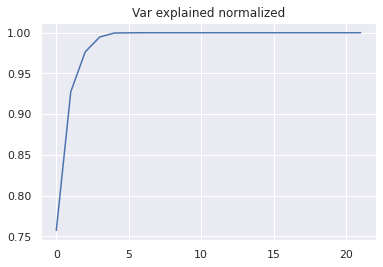

In [ ]:
#print(pca.explained_variance_)
#print(pca.components_)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

En la imagen anterior pordemos observar el comportamiento con todos los elementos $(22 - componentes)$, a partir del 3-4 se estabiliza la varianza.
Acostando los componentes tenemos el siguiente comportamiento, donde en el componente 4 se alcanza estabilidad.

Text(0.5, 1.0, 'Var explained normalized')

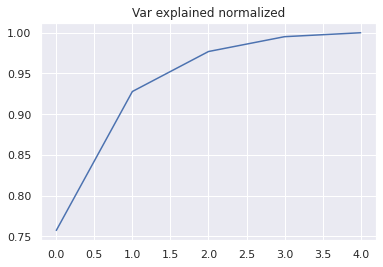

In [ ]:
# Variamos componentes
pca = PCA(n_components=5) #creamos PCA
pca.fit(data) # Entrenamos el modelo PCA 
datatrans = pca.transform(data)
#print("Original shape:",data.shape)
#print("transformed shape:",datatrans.shape)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

En la imagen anterior pordemos observar el comportamiento con todos los elementos (4−componentes), tomando en cuenta que a partir de los 4 componentes obtenemos una estabilización de la varianza de los dados e incluso desde los 3 componente alcanzando una varianza de 0.99.

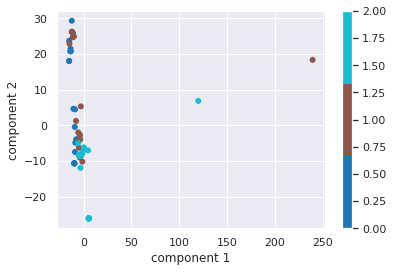

In [ ]:
# Comparar componente 
plt.scatter(datatrans[:, 0], datatrans[:, 1],
            c= Tipo, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

En la anterior gráfica, obtenemos datos muy agrupados, sin permitir clasificar cada uno de los tipos de datos sismicos.
 

## Variamos componentes y comparamos

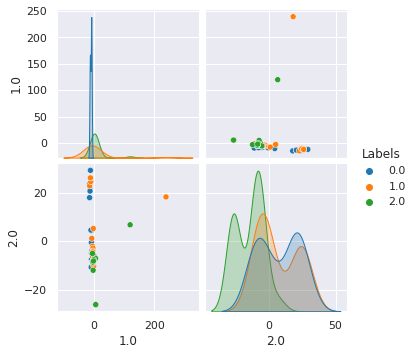

In [ ]:
n = 2
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

con el numero de componentes igual a dos, obtenemos datos muy agrupados sin permitir caracterizar los datos.


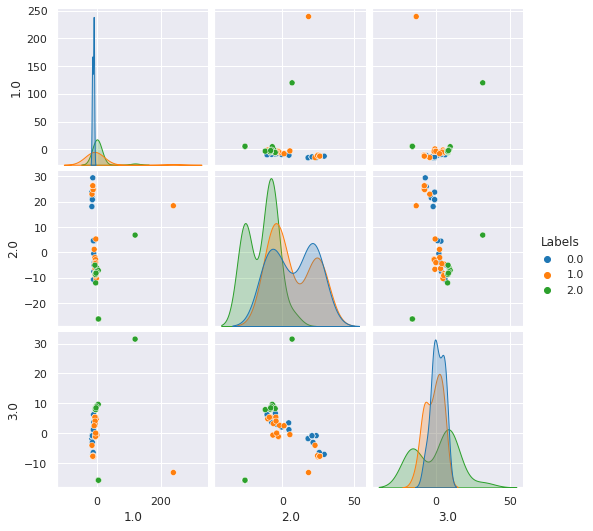

In [ ]:
n = 3
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

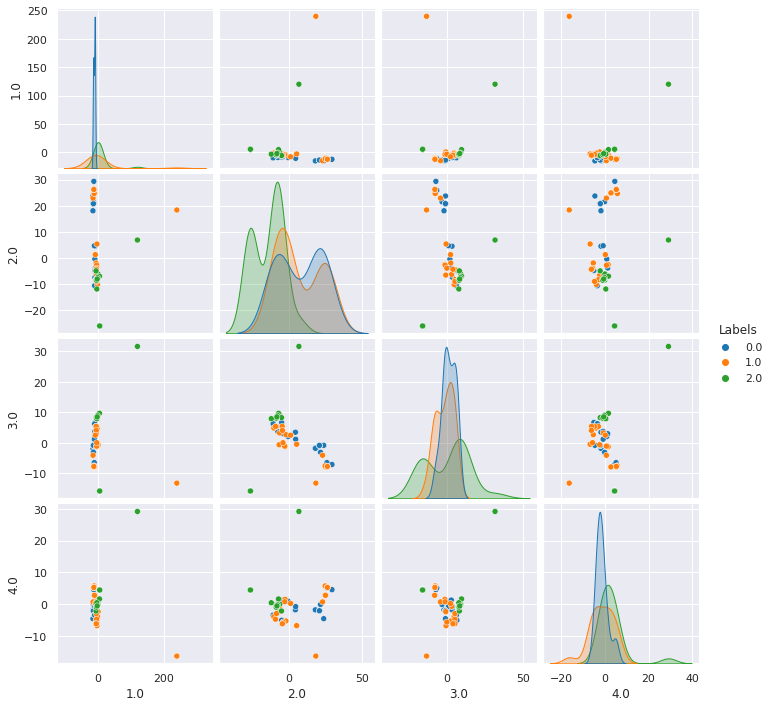

In [ ]:
n = 4
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

subiendo el numero de componentes a 4, podemos ver que los datos de cada uno de los tipos de sismo siguen agrupados, quizar empezamos a ver que la etiqueta de los datos de telesismo empiezan a separarse un poco de los demas datos.

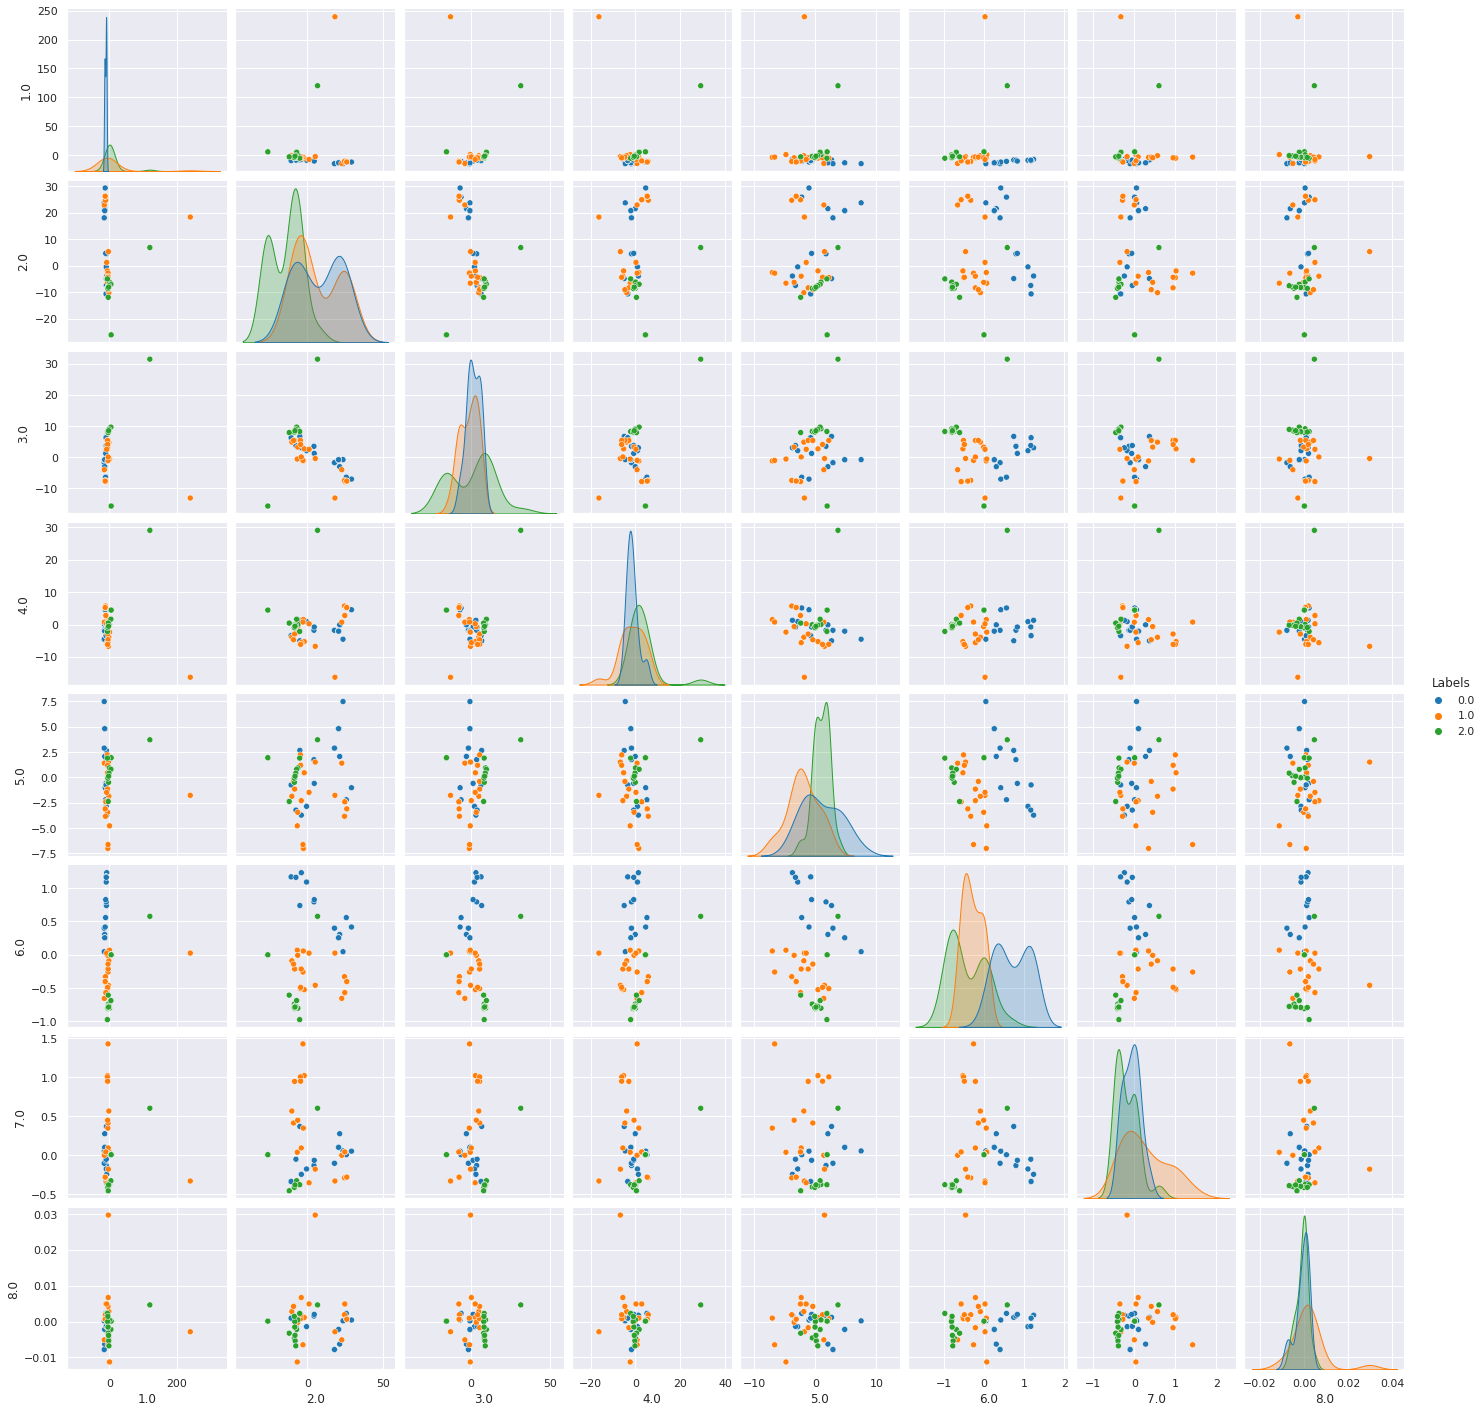

In [ ]:
n = 8
pca = PCA(n_components= n)
projectedZ = pca.fit_transform(data)
BasisW = pca.components_
dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tipo
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Se hace una diferenciacion del numero de componentes desde 1 hasta 8 y podemos observar que haciendo el numero de componentes igual a 6, los datos empiezan a tener cierta convergencia que permite caracterizar y agrupar los diferentes tipos de sismo.

In [ ]:
#n = 14
#pca = PCA(n_components= n)
#projectedZ = pca.fit_transform(data)
#BasisW = pca.components_
#dataFrame = pd.DataFrame(projectedZ,columns=np.linspace(1,n,num=n))
#dataFrame['Labels'] = Tipo
#sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

# Modelos lineales de clasificación 
## Regresión Logística

## Sin PCA

Acuracy Train:  0.9148936170212766
Acuracy Test:  0.75


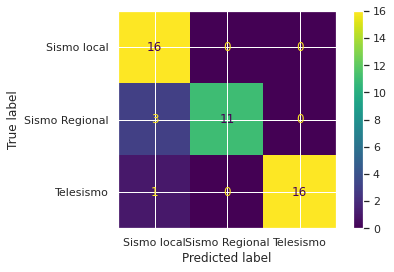

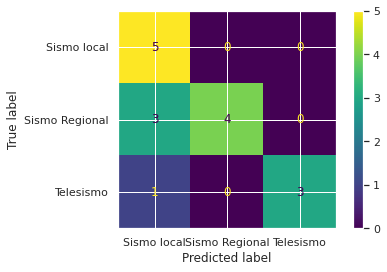

In [ ]:
# importemos algunos datos
data2 = np.asarray(data.drop('Etiquetas',1))
X = data2[:, 6:10]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tipo

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ', Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Sismo local','Sismo Regional','Telesismo'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Sismo local','Sismo Regional','Telesismo'])
ax2.plot()
plt.show()

* sin PCA vemos que la gráfica de entrenamiento tiene un buen comportamiento en la diagonal principal, siendo la prediccion mas regular la casilla correspondiente al sismo regional.

* en la parte del test, tenemos comportamientos más desfavorables en el acierto de la predicción de los datos, teniendo el mejor valor en los datos del sismo local.

## Con PCA

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.8125


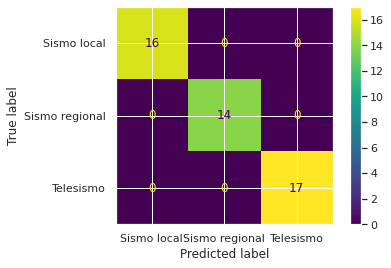

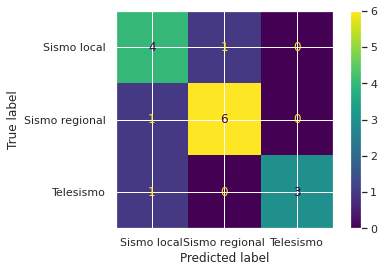

In [ ]:
#data2 = np.asarray(data.drop('Etiquetas',1))
modelPCA = PCA(n_components=8)
X_PCA = data2 

X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, random_state = 123)


# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Sismo local','Sismo regional','Telesismo'])
ax1.plot()
plt.show()


ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Sismo local','Sismo regional','Telesismo'])
ax2.plot()
plt.show()

* Con PCA obtenemos una notable mejoría en la predición de los datos de entrenamiento, obteniendo nuevamento el menor valor en el sismo regional, pero con gran mejoria en los datos obtenidos sin PCA.

* Aun con PCA obtenemos mejoria en el test para los valores de sismo regional, pero desmejora para sismo local, aun así, el Acuracy Test mejora generalmente con el PCA.


## Bayesiano
# Sin PCA

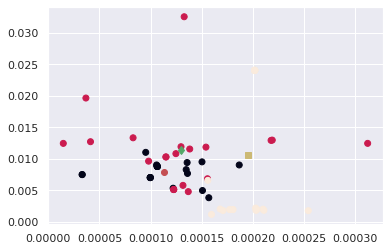

In [ ]:
t = np.asarray(Tipo)
X = data2[:, 6:11] 

pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)

plt.scatter(X[:,0],X[:,1],c = t)
plt.plot(mu_C1[0],mu_C1[1],'or')
plt.plot(mu_C2[0],mu_C2[1],'dg')
plt.plot(mu_C3[0],mu_C3[1],'sy')

plt.show()

[[3.38887274e-01 6.36072504e-01 2.50402217e-02]
 [5.66530533e-01 2.52451055e-01 1.81018412e-01]
 [9.82582965e-01 1.68345847e-02 5.82450794e-04]
 [9.82582965e-01 1.68345847e-02 5.82450794e-04]
 [3.89962375e-01 6.07444682e-01 2.59294267e-03]
 [5.47521648e-01 4.45522896e-01 6.95545585e-03]
 [5.40323616e-01 2.19840949e-01 2.39835435e-01]
 [2.22476921e-01 7.92876119e-02 6.98235467e-01]
 [3.35794513e-01 6.60302517e-01 3.90296930e-03]
 [8.56929345e-01 1.38496478e-01 4.57417683e-03]]
Accuracy:  0.8253968253968254


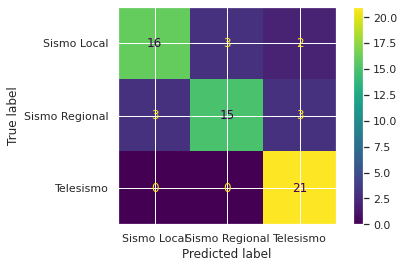

In [ ]:
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)


N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.inv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

print(p_Ck_dado_X[:10])
# print(np.sum(p_Ck_dado_X,axis = 1))
t_Est = np.argmax(p_Ck_dado_X, axis = 1)


Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Sismo Local','Sismo Regional','Telesismo'])
ax.plot()
plt.show()

* para el modelo bayesiano sin PCA podemos ver una buena concatenación de los datos deltro de la matriz resultante, un Acuracy de 0.82 que consideramos un buen nivel de predicción. valor menor para sismo regional y valor sobresaliente para el telesismo, datos que se comportan mejor en la aplicacion de este modelo.

# Con PCA

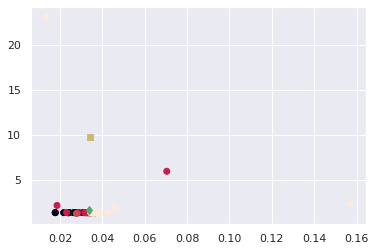

In [ ]:
modelPCA = PCA(n_components=20)
X = data2

X_PCA = modelPCA.fit_transform(X)
t = np.array(Tipo)

#t = np.asarray(Tipo)
#X = data2[:, 6:11] 

pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)

plt.scatter(X[:,0],X[:,1],c = t)
plt.plot(mu_C1[0],mu_C1[1],'or')
plt.plot(mu_C2[0],mu_C2[1],'dg')
plt.plot(mu_C3[0],mu_C3[1],'sy')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


[[ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]
 [ 0. nan nan]]
Accuracy:  0.3333333333333333


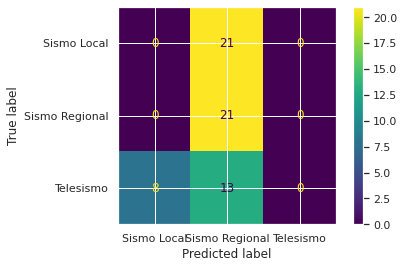

In [ ]:
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)


N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.inv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

print(p_Ck_dado_X[:10])
# print(np.sum(p_Ck_dado_X,axis = 1))
t_Est = np.argmax(p_Ck_dado_X, axis = 1)


Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Sismo Local','Sismo Regional','Telesismo'])
ax.plot()
plt.show()

* Con PCA obtenemos desmejoría en la predicción de los datos, incluso una grafica con un agrupamiento poco claro, tomando como mejor opcion la concatenacion de los datos de predicción con la columna de sismo regional.

# 2

# EigenFaces

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
# Compute the components and projected faces
pca = PCA(n_components = 800,svd_solver='randomized').fit(faces.data) #variar parametroooo
Xfaces = faces.data
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
X_imagenes = faces.images
X_vectores = faces.data

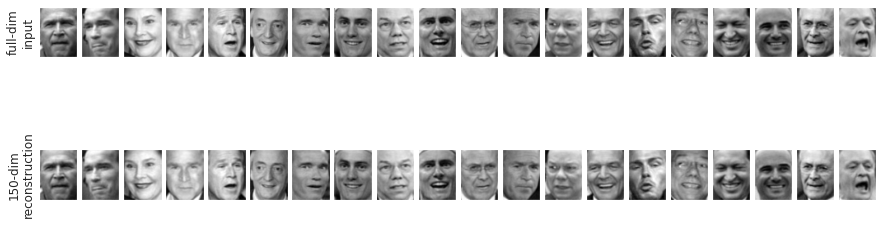

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 20, figsize=(15,5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(20):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

* se apresian las imagenes agregadas y sucorrespondiente reconstrucción con un numero de componentes determinado.

In [ ]:
pca = PCA(n_components = 400, svd_solver='randomized')# variar parametrooo
pca.fit(X_vectores)
# Proyectemos los X en el espacio de entrada (pixeles) al espacio latente (Componentes Principales)
Z = pca.transform(X_vectores)
Wprojection = pca.components_
PC1 = Wprojection[0]

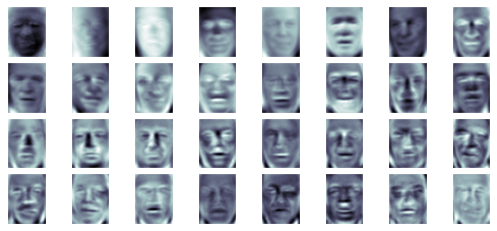

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

* Estas imagenes corresponden a la las capaz que contienen la mayor cantidad de información del rostro original, el numero de componentes utilizadas es de 400 y no siempre más componentes es mejor. se hicieron varios intentos con diferentes numeros de componentes sin obtener mayores cambios, aunque que si notamos que nos presenta problemas si desbordamos el numero de componentes.

2.B

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.8320413436692506


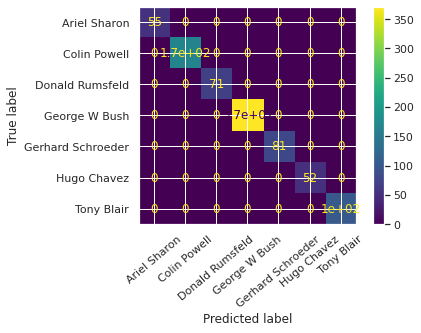

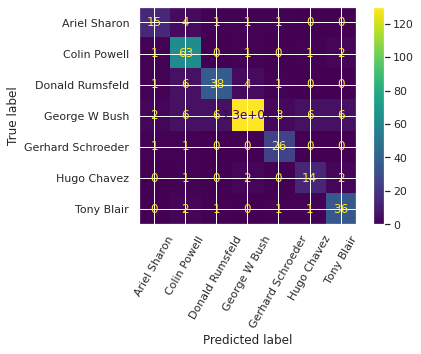

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
faces = fetch_lfw_people(min_faces_per_person=62)
X_vectores = faces.data
pca = PCA(n_components = 450,svd_solver='randomized').fit(faces.data)
pca.fit(X_vectores)
Z = pca.transform(X_vectores)
y = faces.target

model = SVC(C = 100)
Xtrain, Xtest, ytrain, ytest = train_test_split(Z,y, test_size = 0.3, random_state = 123)

model.fit(Xtrain,ytrain)
modelBayesian = LogisticRegression(C = 0.001)
modelBayesian.fit(Xtrain,ytrain)
# Realizamos la predicción tanto para train como para test
yEst_train = modelBayesian.predict(Xtrain)
yEst_test = modelBayesian.predict(Xtest)
# Analicemos el error de predicción
Acc_train = accuracy_score(ytrain, yEst_train)
cMat_train = confusion_matrix(ytrain, yEst_train)

Acc_test = accuracy_score(ytest, yEst_test)
cMat_test = confusion_matrix(ytest, yEst_test)


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

#plt.figure()
ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=faces.target_names)
# aux = ax1.set_xticklabels()
ax1.plot(xticks_rotation = 40)
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=faces.target_names)
ax2.plot(xticks_rotation = 60)
plt.show()

* Se realizaron varios ajustes, se cambiaron varios para metros com o el numero de caras por persona, el numero de componetes  y la sencibilidad de la selección, obteniendo una mejoría en los resultados del Acuracy test =0.83. con 62 caras por persona y 450 componentes.

*  con respecto a los datos del entrenamiento, podemos ver excelentes resultados en la concatenación de los diferentes rostros, mientras que en el test si obtenemos algunos datos por fuera de la diagonal principal de la matriz.

**Conclusiones**

* Según los resultados obtenidos, en la caracterizacion de los tipos de sismos, el analisis del train y el test con el modelo bayesiano tiene mejores resultados sin el PCA.

* Los datos correspondientes al telesismo son los que tienen menor undice de acierto según los resultados del tes en comparacion con las predicciones del train en el modelo de regresión logistica.